<a href="https://colab.research.google.com/github/willianszwy/Aprendizado-Supervisionado-no-Neuronio-Perceptron/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Parte I - Resolvendo um problema linearmente separável

Clonando o repositório do github que contém o data

In [9]:
# Descomentar essa linha se der erro
!git clone https://github.com/jesusdourado/rna-atividade2.1-data.git

fatal: destination path 'rna-atividade2.1-data' already exists and is not an empty directory.


In [34]:
exemplos = np.fromfile('rna-atividade2.1-data/data/dataAll.txt').reshape(-1,3)

In [35]:
#random.seed(dt.datetime.now().time())
np.random.seed()

## Implementando o neurônio Perceptron de Rosenblatt

In [36]:
class Perceptron:

    def __init__(self, tamanho, bias = 0, taxa_aprendizado = 0.1, min_peso = -0.5, max_peso = 0.5) -> None:
        self.bias = bias
        self.taxa_aprendizado = taxa_aprendizado
        self.pesos = np.zeros(tamanho + 1)
        self.pesos[0] = random.uniform(min_peso, max_peso)
        self.pesos[1] = random.uniform(min_peso, max_peso)
        self.pesos[2] = random.uniform(min_peso, max_peso)
        self.entradas = np.empty(tamanho + 1)
        self.entradas[0] = self.bias
        self.erro = 0
        self.atualiza_pesos_contador = 0 

    def treinar_limitado_epoca(self, d, qtd_epocas = 100):
      print("Vetor de pesos iniciais: ")
      print(self.pesos)
      tamanho_dados = len(d)
      epoca = 0
      continua = True
      while continua and epoca < qtd_epocas:
        if epoca > 0:
          d = np.random.permutation(d)
        epoca += 1
        contem_erro = False
        qtd_ajustes_pesos_epoca = 0

        for i in range(d.shape[0]):
          
          self.entradas[1] = d[i][0]
          self.entradas[2] = d[i][1]

          y = self.predicao()
          self.calcula_erro(y, d[i][2])

          if self.erro != 0:
            qtd_ajustes_pesos_epoca += 1
            self.atualiza_pesos()
            contem_erro = True

        if not contem_erro:
          continua = True

      self.mostrar_relatorio_treino(epoca)

    def treinar(self, d):
        print("Pesos iniciais: ", self.pesos)
        epoca = 0
        continua = True
        while continua:
            epoca += 1
            print("Época: ", epoca)
            contem_erro = False
            qtd_ajustes_pesos_epoca = 0

            for i in range(d.shape[0]):

                self.entradas[1] = d[i][0]
                self.entradas[2] = d[i][1]

                y = self.predicao()
                self.calcula_erro(y, d[i][2])

                if self.erro != 0:
                    self.atualiza_pesos()
                    #print("pesos atualizados: ",self.pesos)
                    qtd_ajustes_pesos_epoca += 1
                    contem_erro = True      

            print("Total ajustes de pesos da época: ", qtd_ajustes_pesos_epoca)

            if not contem_erro:
                continua = False
        return self.mostrar_relatorio_treino(epoca)

    def mostrar_relatorio_treino(self, num_epocas):
      print("\n","="*6, "RELATÓRIO DO TREINO", "="*6)
      print("Número total de ajustes dos pesos: ", self.atualiza_pesos_contador)
      print("Número de Épocas: ", num_epocas)
      print("Pesos finais: ", self.pesos)

      return [self.atualiza_pesos_contador, num_epocas]

    def teste(self, prever_classe):
      lista_predicao = []
      for registro in prever_classe:
        self.entradas[1] = registro[0]
        self.entradas[2] = registro[1]

        y = self.predicao()
        lista_predicao.append(y)
      return lista_predicao

    def funcao_de_ativacao(self, x):
        return 1 if x >= 0 else 0

    def predicao(self):
        y = self.pesos.T.dot(self.entradas)
        return self.funcao_de_ativacao(y)

    def calcula_erro(self,y, yd):
        self.erro = yd - y

    def delta(self):
        return self.taxa_aprendizado * self.erro * self.entradas

    def atualiza_pesos(self):
            self.pesos =  self.pesos + self.delta()
            self.atualiza_pesos_contador += 1

    def plot_data(self,X, scala_min = -1000, scala_max = 1000):
        plt.figure(figsize=(10,6))
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.title("Neurônio Perceptron")
        plt.grid(True)

        for i in range(X.shape[0]):
            plt.plot(X[i][0],X[i][1],'b.' if (X[i][2] == 1) else 'r.')

        x1 = np.array([scala_min, scala_max])
        m = -self.pesos[1]/self.pesos[2]
        c = -self.pesos[0]/self.pesos[2]
        x2 = m*x1 + c
    
        plt.plot(x1, x2, 'k-',linewidth=2)

In [38]:
neuronio = Perceptron(2)
neuronio.treinar(exemplos)

Pesos iniciais:  [ 0.3554858  -0.24115818  0.21553364]
Época:  1
Total ajustes de pesos da época:  24
Época:  2
Total ajustes de pesos da época:  20
Época:  3
Total ajustes de pesos da época:  11
Época:  4
Total ajustes de pesos da época:  0

 ====== RELATÓRIO DO TREINO ======
Número total de ajustes dos pesos:  55
Número de Épocas:  4
Pesos finais:  [   0.3554858   323.16787182 -323.29530636]


[55, 4]

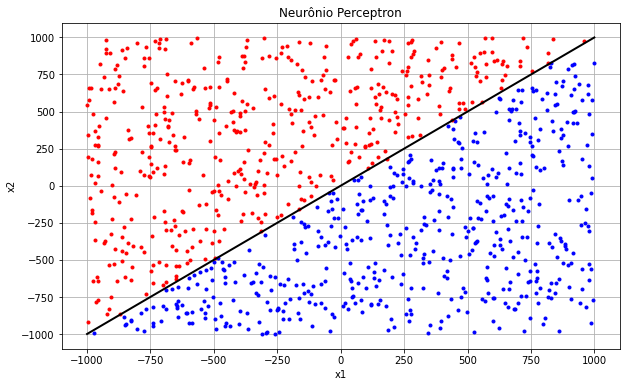

In [39]:
neuronio.plot_data(exemplos)

# Parte II - Experimentação

Calculando o identificador para ler o data**X**.txt

In [48]:
def caminhoDados ():
  matriculas = [1715080108, 1815310070, 1515080172, 1815310027]
  soma = 0

  for m in matriculas:
    soma += m % 10

  x = soma % 4

  return 'rna-atividade2.1-data/data/data' + str(x) + '.txt'

In [17]:
exemplos = np.fromfile(caminhoDados()).reshape(-1, 3)

Realizando o treino para ...

In [28]:
valores_n = [0.4, 0.1, 0.01]
valores_I = [100, 0.5]

In [47]:
for I in valores_I:
  for n in valores_n:
    print('---------------------------------------------------------')
    print('Treino para n = ' + str(n) + ', I no intervalo [-' + str(I) + ', +' + str(I) + ']')

    for _ in range(10):
      neuronio = Perceptron(2, -1, n, -1 * I, I)
      #stats = neuronio.treinar(exemplos)
    


---------------------------------------------------------
Treino para n = 0.4, I no intervalo [-100, +100]
---------------------------------------------------------
Treino para n = 0.1, I no intervalo [-100, +100]
---------------------------------------------------------
Treino para n = 0.01, I no intervalo [-100, +100]
---------------------------------------------------------
Treino para n = 0.4, I no intervalo [-0.5, +0.5]
---------------------------------------------------------
Treino para n = 0.1, I no intervalo [-0.5, +0.5]
---------------------------------------------------------
Treino para n = 0.01, I no intervalo [-0.5, +0.5]


# Parte III - Validação *Holdout* em problema não linearmente separável

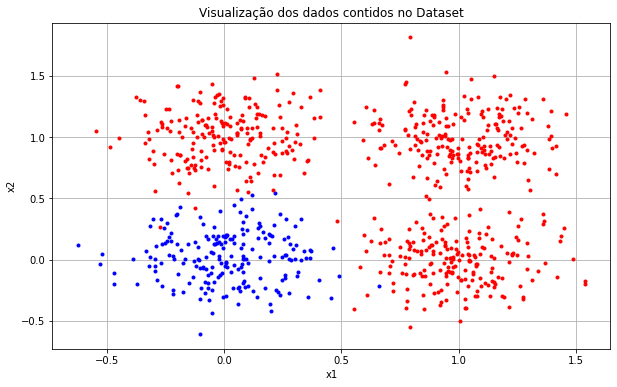

In [19]:
exemplos_holdout = np.fromfile("rna-atividade2.1-data/data/dataHoldout.txt").reshape(-1, 3)


plt.figure(figsize=(10,6))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Visualização dos dados contidos no Dataset")
plt.grid(True)

for i in range(exemplos_holdout.shape[0]):
    plt.plot(exemplos_holdout[i][0], exemplos_holdout[i][1], 'b.' if (exemplos_holdout[i][2] == 1) else 'r.')

plt.show()

Conforme os dados estão distrubídos no gráfico acima, podemos inferir que o problema não é linearmente sepável visto que não conseguimos gerar um hiperplano, ou seja, não conseguimos serparar através de uma reta. Sabendo disso, utilizaremos o perceptron para treinar até 100 épocas, para ver como o algoritmo irá se sair. 

In [20]:
exemplos_holdout = np.fromfile("rna-atividade2.1-data/data/dataHoldout.txt").reshape(-1, 3)

tamanho_dataset = exemplos_holdout.shape[0]
tamanho_treino = int(tamanho_dataset * 0.7)

exemplos_aleatorios = np.random.permutation(exemplos_holdout)

exemplos_treino = exemplos_aleatorios[:tamanho_treino]
exemplos_teste = exemplos_aleatorios[tamanho_treino:]

neuronio = Perceptron(tamanho = 2, bias = -1, taxa_aprendizado = 0.1, min_peso = -0.5, max_peso = 0.5)
neuronio.treinar_limitado_epoca(exemplos_treino)

Vetor de pesos iniciais: 
[-0.15844488 -0.47664689  0.18683975]

 ====== RELATÓRIO DO TREINO ======
Número total de ajustes dos pesos:  3167
Número de Épocas:  100
Pesos finais:  [-0.25844488 -0.40270958 -0.44789161]


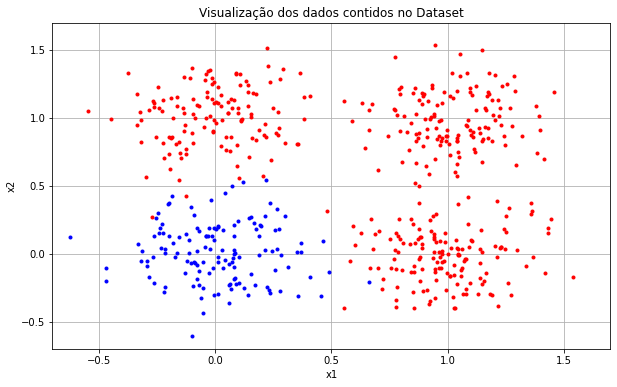

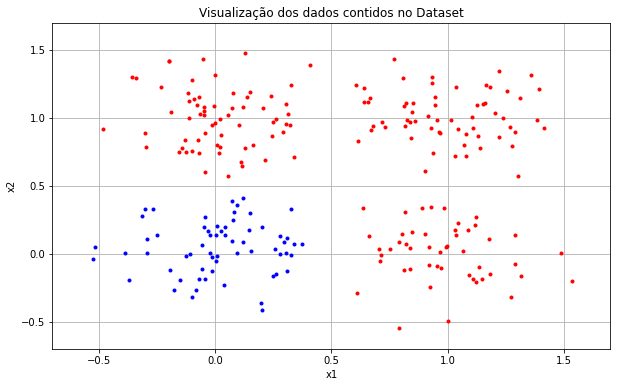

In [21]:
plt.figure(figsize=(10,6))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Visualização dos dados contidos no Dataset")
plt.grid(True)
plt.axis([-0.7, 1.7, -0.7, 1.7])
for i in range(exemplos_treino.shape[0]):
    plt.plot(exemplos_treino[i][0], exemplos_treino[i][1], 'b.' if (exemplos_treino[i][2] == 1) else 'r.')

plt.show()

plt.figure(figsize=(10,6))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Visualização dos dados contidos no Dataset")
plt.axis([-0.7, 1.7, -0.7, 1.7])
plt.grid(True)

for i in range(exemplos_teste.shape[0]):
    plt.plot(exemplos_teste[i][0], exemplos_teste[i][1], 'b.' if (exemplos_teste[i][2] == 1) else 'r.')

plt.show()

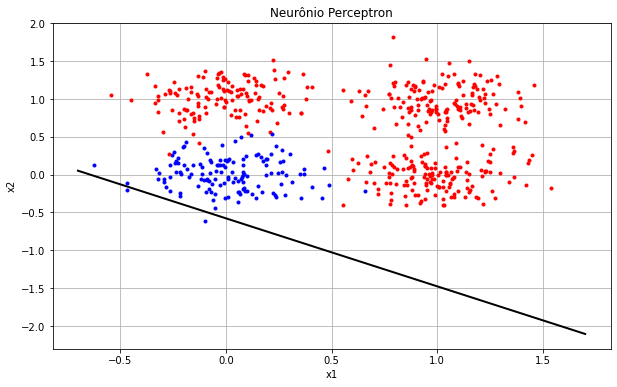

In [22]:
neuronio.plot_data(exemplos_treino, scala_min= -0.7, scala_max=1.7)

In [23]:
exemplos_teste_x = exemplos_teste[:,:2]
exemplos_teste_y = exemplos_teste[:,2]

predicao_teste = neuronio.teste(exemplos_teste_x)

cm = confusion_matrix(exemplos_teste_y, predicao_teste)
cm

array([[171,   6],
       [  1,  62]])

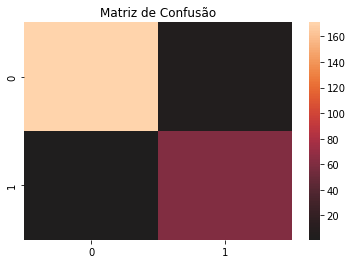

In [24]:
sns.heatmap(cm, center=True)
plt.title("Matriz de Confusão")
plt.show()

In [25]:
exemplos_treino_x = exemplos_treino[:,:2]
exemplos_treino_y = exemplos_treino[:,2]

predicao_treino = neuronio.teste(exemplos_treino_x)

print("Acurácia para os dados do conjunto de treinamento inicialmente fornecido: ", metrics.accuracy_score(exemplos_treino_y, predicao_treino))

Acurácia para os dados do conjunto de treinamento inicialmente fornecido:  0.9428571428571428


In [26]:
nome_classes = ["Classe 0", "Classe 1"]
print(metrics.classification_report(exemplos_treino_y, predicao_treino, target_names=nome_classes))

              precision    recall  f1-score   support

    Classe 0       0.99      0.93      0.96       423
    Classe 1       0.82      0.98      0.89       137

    accuracy                           0.94       560
   macro avg       0.91      0.95      0.93       560
weighted avg       0.95      0.94      0.94       560

